<a href="https://colab.research.google.com/github/AmirHoseein99/HandsOnAI_Excersies/blob/master/Chapter_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8. Practice training a deep neural network on the CIFAR10 image dataset

In [45]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
CIFAR10_dataset = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = CIFAR10_dataset.load_data()

In [25]:
print(X_train_full.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[9]


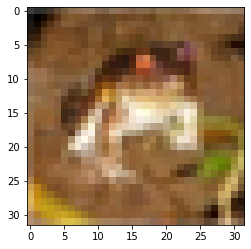

In [22]:
imgplot = plt.imshow(X_train_full[0])
print(y_train_full[0])

In [23]:
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

In [24]:
print(X_train.shape)
print(X_valid.shape)

(46000, 32, 32, 3)
(4000, 32, 32, 3)


In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
      model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_141 (Dense)            (None, 100)               307300    
_________________________________________________________________
dense_142 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_143 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_144 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_145 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_146 (Dense)            (None, 100)              

In [73]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

In [29]:
earlystop_cb = keras.callbacks.EarlyStopping(patience=10)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[earlystop_cb], verbose=1)

In [ ]:
model.evaluate(X_valid, y_valid)

In [65]:
batched_model = keras.models.Sequential()
batched_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
      batched_model.add(keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
                                                keras.layers.BatchNormalization(),
                                                keras.layers.Activation("elu"))
batched_model.add(keras.layers.Dense(10, activation="softmax"))

In [66]:
batched_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

In [69]:
batched_history = batched_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[earlystop_cb], verbose=1)

Epoch 1/100
1438/1438 [==============================] - 32s 22ms/step - loss: 1.6420 - accuracy: 0.4107 - val_loss: 1.5944 - val_accuracy: 0.4280
Epoch 2/100
1438/1438 [==============================] - 32s 22ms/step - loss: 1.5825 - accuracy: 0.4371 - val_loss: 1.5283 - val_accuracy: 0.4490
Epoch 3/100
1438/1438 [==============================] - 32s 22ms/step - loss: 1.5315 - accuracy: 0.4540 - val_loss: 1.4719 - val_accuracy: 0.4795
Epoch 4/100
1438/1438 [==============================] - 31s 22ms/step - loss: 1.4949 - accuracy: 0.4652 - val_loss: 1.4758 - val_accuracy: 0.4665
Epoch 5/100
1438/1438 [==============================] - 31s 21ms/step - loss: 1.4611 - accuracy: 0.4781 - val_loss: 1.4050 - val_accuracy: 0.4972
Epoch 6/100
1438/1438 [==============================] - 31s 21ms/step - loss: 1.4305 - accuracy: 0.4900 - val_loss: 1.4379 - val_accuracy: 0.4850
Epoch 7/100
1438/1438 [==============================] - 32s 22ms/step - loss: 1.4008 - accuracy: 0.5026 - val_loss: 1

In [78]:
batched_model.evaluate(X_valid, y_valid)

125/125 [==============================] - 1s 5ms/step - loss: 1.3249 - accuracy: 0.5405


[1.3248662948608398, 0.5404999852180481]

In [79]:
selued_model = keras.models.Sequential()
selued_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    selued_model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
selued_model.add(keras.layers.Dense(10, activation="softmax"))

In [80]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [81]:
selued_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

In [82]:
selued_history = selued_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[earlystop_cb], verbose=1)

Epoch 1/100
1438/1438 [==============================] - 25s 15ms/step - loss: 2.2805 - accuracy: 0.1756 - val_loss: 1.9583 - val_accuracy: 0.2650
Epoch 2/100
1438/1438 [==============================] - 21s 14ms/step - loss: 1.9626 - accuracy: 0.2515 - val_loss: 1.9097 - val_accuracy: 0.2822
Epoch 3/100
1438/1438 [==============================] - 21s 14ms/step - loss: 1.8914 - accuracy: 0.2892 - val_loss: 1.8382 - val_accuracy: 0.3128
Epoch 4/100
1438/1438 [==============================] - 21s 14ms/step - loss: 1.8504 - accuracy: 0.3085 - val_loss: 1.8261 - val_accuracy: 0.3225
Epoch 5/100
1438/1438 [==============================] - 20s 14ms/step - loss: 1.8081 - accuracy: 0.3270 - val_loss: 1.7734 - val_accuracy: 0.3550
Epoch 6/100
1438/1438 [==============================] - 21s 14ms/step - loss: 1.7986 - accuracy: 0.3396 - val_loss: 1.7653 - val_accuracy: 0.3557
Epoch 7/100
1438/1438 [==============================] - 21s 14ms/step - loss: 1.7462 - accuracy: 0.3615 - val_loss: 1

In [83]:
selued_model.evaluate(X_valid, y_valid)

125/125 [==============================] - 0s 3ms/step - loss: 1.6780 - accuracy: 0.3930


[1.6780493259429932, 0.3930000066757202]

In [94]:
dropOuted_model = keras.models.Sequential()
dropOuted_model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    dropOuted_model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
    dropOuted_model.add(keras.layers.Dropout(rate=0.1))
dropOuted_model.add(keras.layers.Dense(10, activation="softmax"))

In [95]:
dropOuted_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

In [97]:
dropOuted_history = dropOuted_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[earlystop_cb], verbose=1)

Epoch 1/100
1438/1438 [==============================] - 23s 16ms/step - loss: 2.2887 - accuracy: 0.1392 - val_loss: 2.1703 - val_accuracy: 0.1445
Epoch 2/100
1438/1438 [==============================] - 22s 16ms/step - loss: 2.1079 - accuracy: 0.1765 - val_loss: 2.0798 - val_accuracy: 0.1822
Epoch 3/100
1438/1438 [==============================] - 23s 16ms/step - loss: 2.0588 - accuracy: 0.1910 - val_loss: 2.0555 - val_accuracy: 0.1937
Epoch 4/100
1438/1438 [==============================] - 23s 16ms/step - loss: 2.0379 - accuracy: 0.2023 - val_loss: 2.0263 - val_accuracy: 0.2005
Epoch 5/100
1438/1438 [==============================] - 22s 15ms/step - loss: 2.0556 - accuracy: 0.2015 - val_loss: 2.0541 - val_accuracy: 0.1933
Epoch 6/100
1438/1438 [==============================] - 23s 16ms/step - loss: 2.0874 - accuracy: 0.1907 - val_loss: 2.0807 - val_accuracy: 0.1902
Epoch 7/100
1438/1438 [==============================] - 23s 16ms/step - loss: 2.1189 - accuracy: 0.1729 - val_loss: 2

In [98]:
dropOuted_model.evaluate(X_valid, y_valid)

125/125 [==============================] - 0s 4ms/step - loss: 1.9950 - accuracy: 0.2200


[1.9950259923934937, 0.2199999988079071]

In [ ]:
class MCDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

In [ ]:
mc_model = keras.models.Sequential([
    MCDropout(layer.rate) if isinstance(layer, keras.layers.Dropout) else layer
    for layer in dropOuted_model.layers
])

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [ ]:
y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy